In [387]:
# enables automatic module reloading
# reloads all imported modules whenever their source code changes

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [251]:
import warnings
warnings.filterwarnings("ignore")

import sys
import pandas as pd
from pathlib import Path

In [352]:
# add the project’s root directory to Python’s import path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

print("Project root added to sys.path:", project_root)

Project root added to sys.path: /Users/pawel/PycharmProjects/GitHub


# 1. Read raw data

## 1.1 Download data from Google Drive file source

In [353]:
# cars_00_download_data_PJ.py

import src_PJ.cars_00_download_data_PJ as mod_download
mod_download.download_raw_files()

Downloading...
From: https://drive.google.com/uc?id=1QrhkJvc42A5rZ_u4wQu0qwODj5UMZlLe
To: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/raw/cars.csv
100%|██████████| 18.3k/18.3k [00:00<00:00, 16.2MB/s]

Download complete.


## 1.2 Load data from local file

In [383]:
# cars_01_load_data_PJ.py

from src_PJ.cars_01_load_data_PJ import load_cars_data
load_cars_data()


File loaded from: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/raw/cars.csv

=== Head ===
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# 2. Check data

## 2.1 Data description

In [384]:
# cars_02_check_data.py

from src_PJ.cars_02_check_data import load_cars_data
load_cars_data()


file loaded from: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/raw/cars.csv

----- shape -----
number of lines: 392
number of columns: 9

----- columns in the dataset -----
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

----- data frame -----
             Data types  Number of unique values  Number of missing values  \
mpg             float64                      127                         0   
cylinders         int64                        5                         0   
displacement    float64                       81                         0   
horsepower        int64                       93                         0   
weight            int64                      346                         0   
acceleration    float64                       95                         0   
year              int64                       13                         0   
origin            int64                        3                


Cars with 3 cylinders have unusual characteristics: the engine displacement is unrealistically low, while the horsepower is too high for such a small engine size. **Cars with 3 cylinders will be removed from the dataset.**


## 2.2 Clean data

In [385]:
# cars_03_clean_data_PJ.py

from src_PJ.cars_03_clean_data_PJ import clean_data_remove_3_cylinders
clean_data_remove_3_cylinders()

Loading raw data from: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/raw/cars.csv
[INFO] Removing cars with 3 cylinders...
Cleaned dataset saved to: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/interim/cars_no_3cylinders.csv

-----shape: cars_no_3cylinders.csv -----
(388, 9)


# 3. Explore Data Analysis

### Histograms with mean, median, and standard deviation lines

----- Histograms with statistics -----


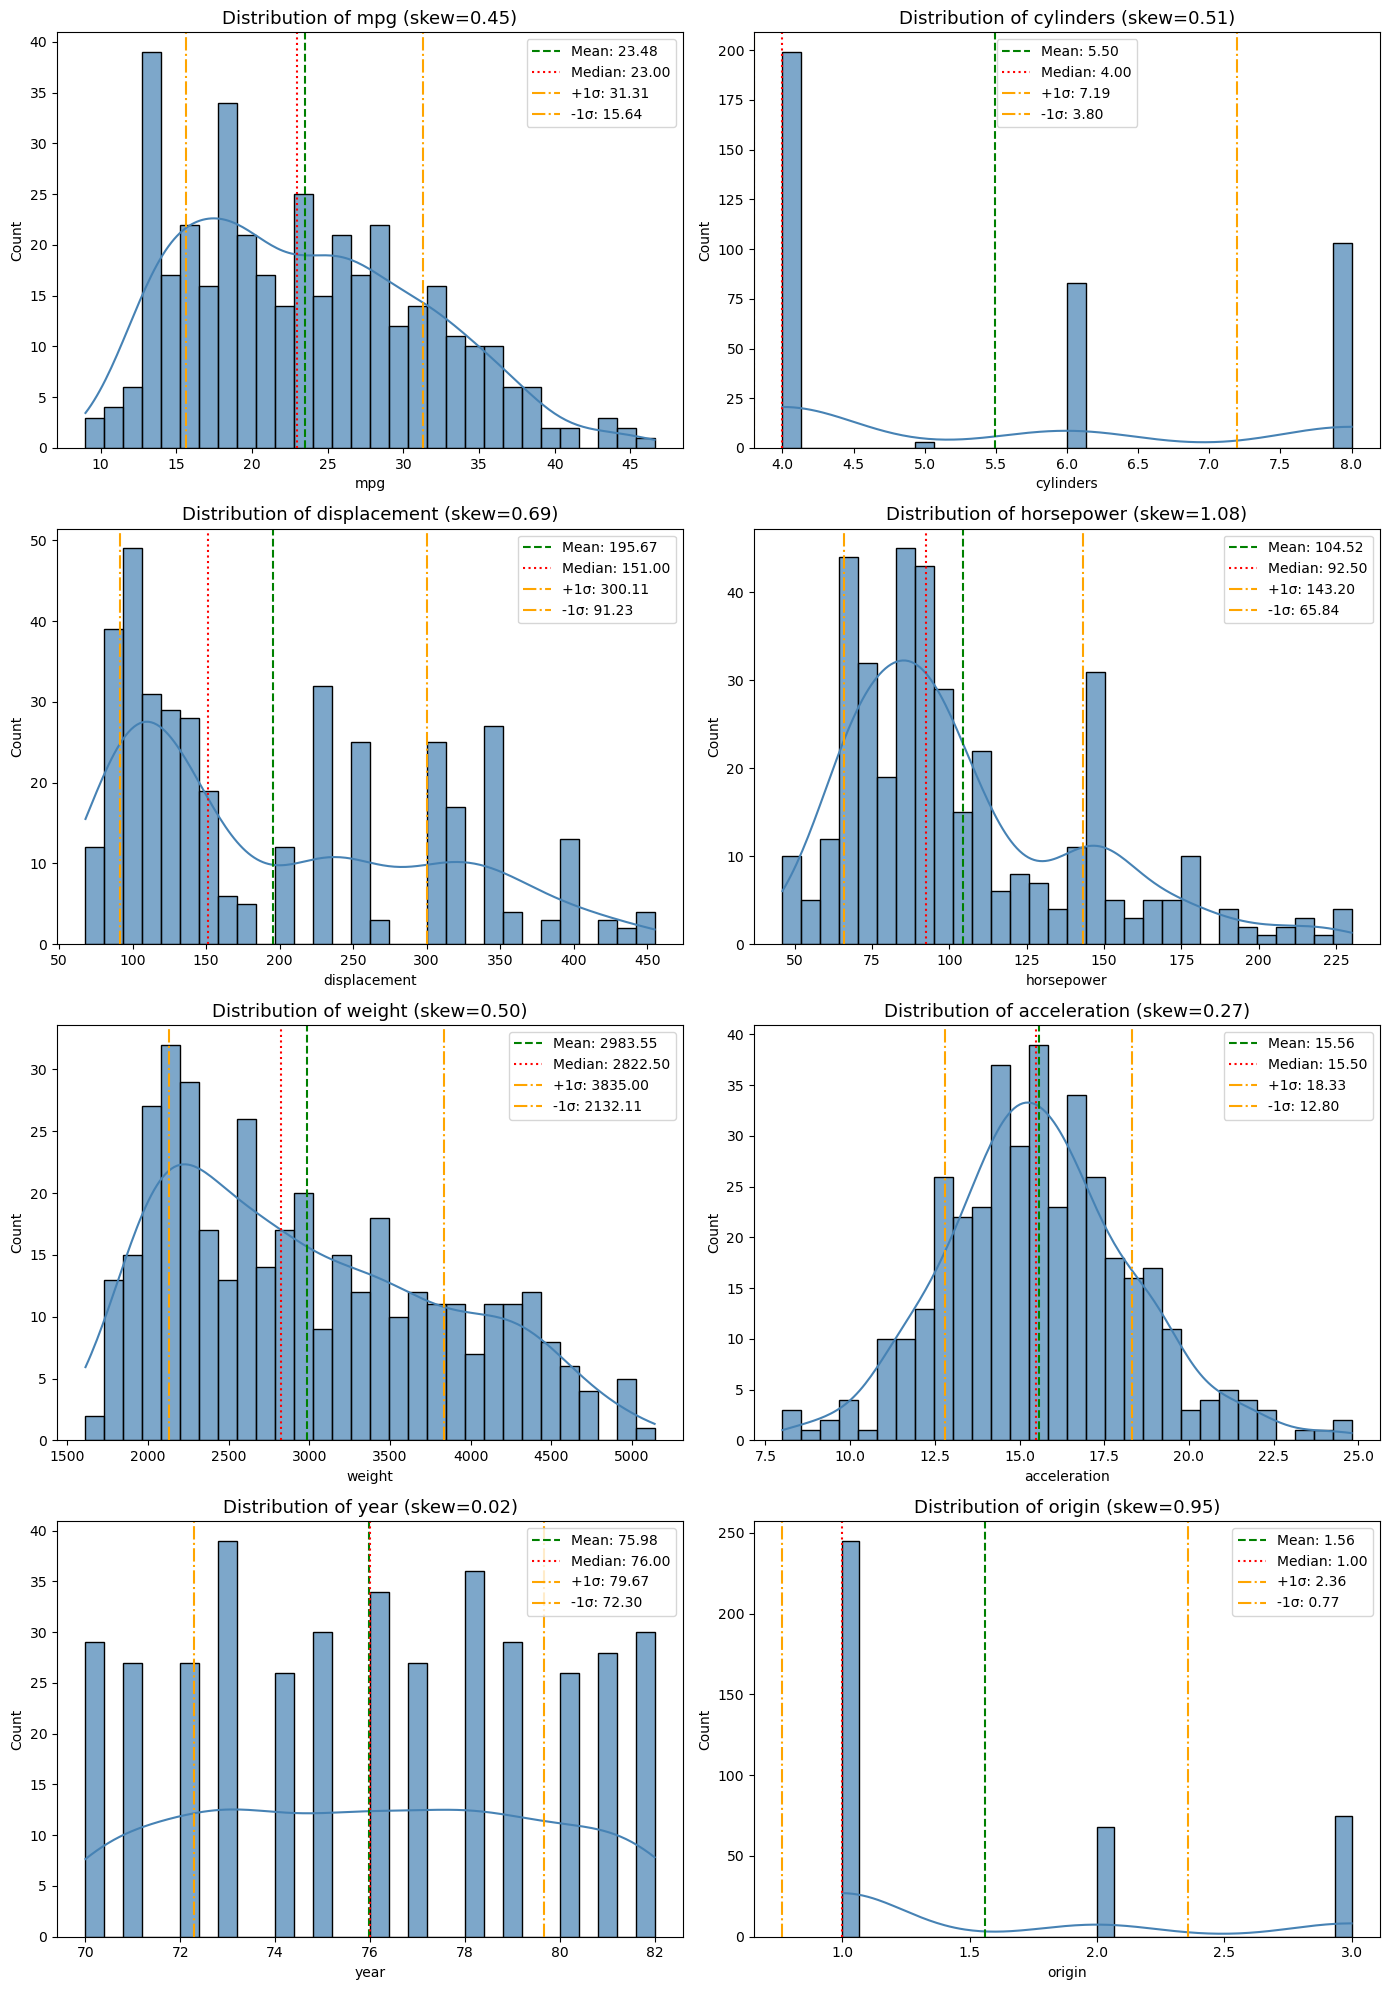

In [388]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import plot_histograms_with_stats
from src_PJ.config_PJ import INTERIM_DIR

df = pd.read_csv(INTERIM_DIR / "cars_no_3cylinders.csv")
plot_histograms_with_stats(df)

In [389]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import compute_skew
from src_PJ.config_PJ import INTERIM_DIR

df = pd.read_csv(INTERIM_DIR / "cars_no_3cylinders.csv")
compute_skew(df)

Skewness values:
mpg             0.446209
cylinders       0.509305
displacement    0.693374
horsepower      1.078652
weight          0.504625
acceleration    0.274173
dtype: float64


The variable **horsepower** exhibits a strong right-skewed distribution, with a skewness value of **1.078652**, which exceeds the commonly used threshold of |skew| ≥ 1. Such high skewness may negatively impact linear models, as they assume predictors to be approximately normally distributed.
Therefore, we apply a **logarithmic transformation** to reduce skewness and stabilize variance.

### Boxplots – visualization of outliers, clean dataset

Analyzing columns: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


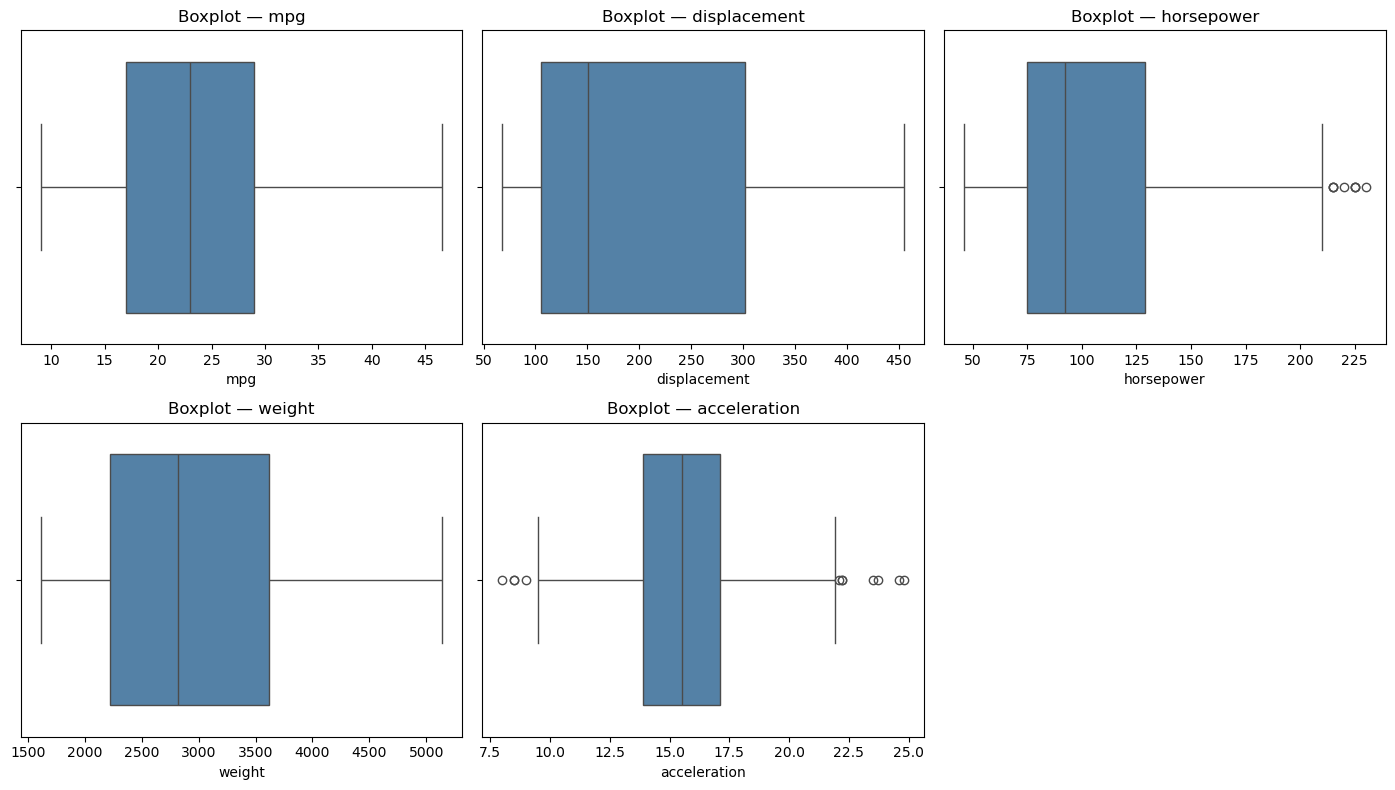


=== OUTLIER SUMMARY ===
Total rows with any outlier: 17

Outliers per column:
  mpg: 0
  displacement: 0
  horsepower: 8
  weight: 0
  acceleration: 11

Clean dataset saved to: /Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/interim/cars_no_cyl_outliers_iqr.csv

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
6    14.0          8         454.0         220    4354           9.0    70   
7    14.0          8         440.0         215    4312           8.5    70   
8    14.0          8         455.0         225    4425          10.0    70   
9    15.0          8         390.0         190    3850           8.5    70   
11   14.0          8         340.0         160    3609           8.0    70   
13   14.0          8         455.0         225    3086          10.0    70   
25   10.0          8         360.0         215    4615          14.0    70   
58   23.0          4          97.0          54    2254          23.5    72   
92   13.0          8      

In [390]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import show_outliers_iqr_with_boxplots_2
from src_PJ.config_PJ import INTERIM_DIR

# Load data without 3 cylinders
df_out_3 = pd.read_csv(INTERIM_DIR / "cars_no_3cylinders.csv")

# Numerical columns
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Auto-save feature
result = show_outliers_iqr_with_boxplots_2(
    df_out_3,
    columns=numeric_cols,
    save_clean_path=INTERIM_DIR / "cars_no_cyl_outliers_iqr.csv"
)

# Access to results:
outliers_only = result["outliers_only"]
mask_df = result["mask_df"]
df_clean = result["df_clean"]

print(outliers_only)


## 3.1 Logarithmic transformation of the horsepower variable

### Logarithmic transformation

In [391]:
from src_PJ.cars_04_exploratory_data_analysis import add_log_transforms
from src_PJ.config_PJ import INTERIM_DIR
import pandas as pd

df = pd.read_csv(INTERIM_DIR / "cars_no_cyl_outliers_iqr.csv")
df_log = add_log_transforms(df, ["horsepower"])
df_log.to_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv", index=False)

Added column: horsepower_log


## Second-Stage EDA (After Cleaning & Transformations)

### Histograms with mean, median, and standard deviation lines

Plotting histogram + boxplot for columns: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'horsepower_log']


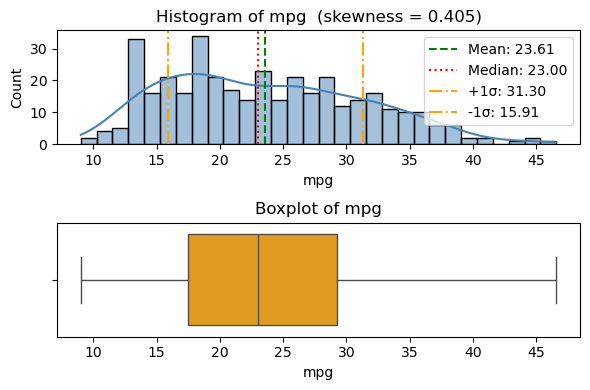

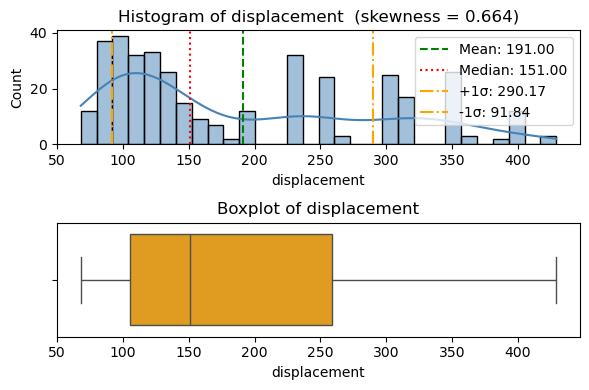

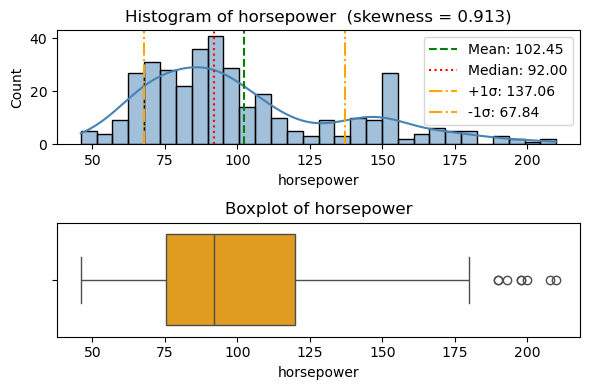

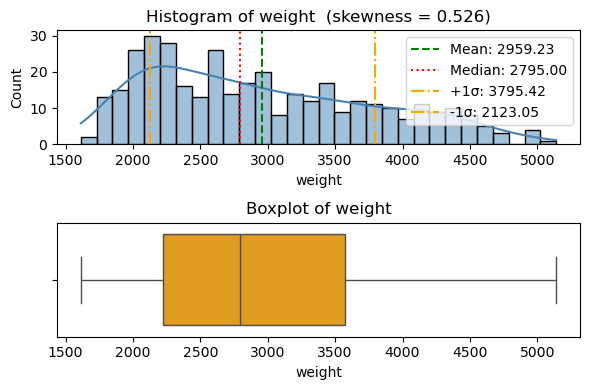

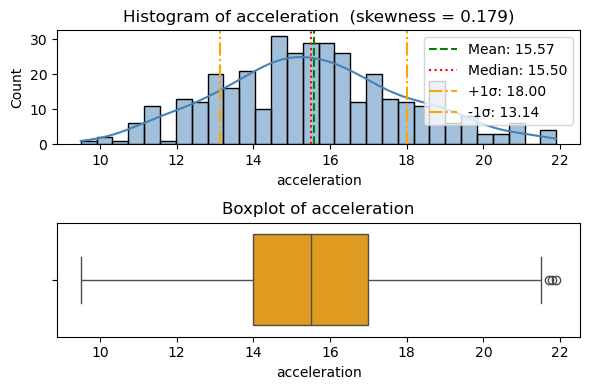

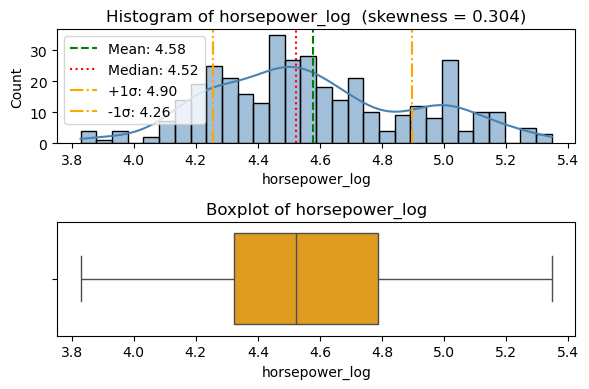

In [392]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import plot_histogram_and_boxplot
from src_PJ.config_PJ import INTERIM_DIR

# load dataset
df_final = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv")
plot_histogram_and_boxplot(
    df_final,
    exclude_columns=["year", "origin", "name", 'cylinders']   # name i tak nie jest numeryczna, ale dla czytelności
)

----- Correlation Heatmap -----


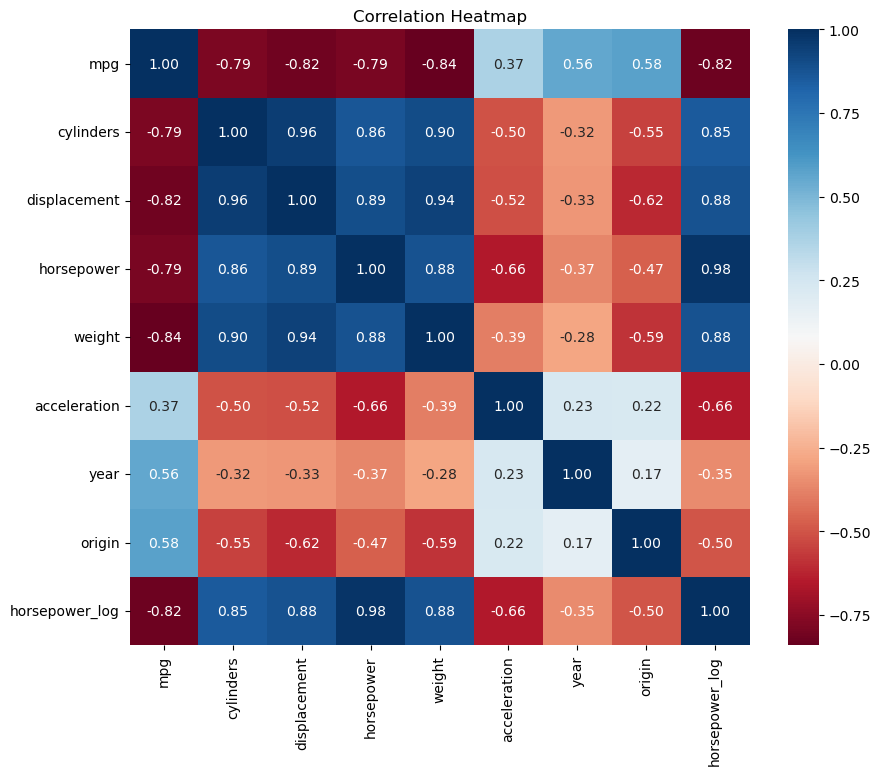

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,horsepower_log
mpg,1.000000,-0.790432,-0.819775,-0.793365,-0.841516,0.373524,0.557054,0.581538,-0.820074
cylinders,-0.790432,1.000000,0.955092,0.864267,0.899910,-0.504346,-0.320113,-0.552037,0.853649
displacement,-0.819775,0.955092,1.000000,0.892747,0.940636,-0.515467,-0.329523,-0.615060,0.881567
horsepower,-0.793365,0.864267,0.892747,1.000000,0.882588,-0.655283,-0.369522,-0.469797,0.984084
weight,-0.841516,0.899910,0.940636,0.882588,1.000000,-0.394291,-0.282469,-0.585015,0.884729
acceleration,0.373524,-0.504346,-0.515467,-0.655283,-0.394291,1.000000,0.232273,0.224239,-0.655828
year,0.557054,-0.320113,-0.329523,-0.369522,-0.282469,0.232273,1.000000,0.167669,-0.353433
origin,0.581538,-0.552037,-0.615060,-0.469797,-0.585015,0.224239,0.167669,1.000000,-0.497540
horsepower_log,-0.820074,0.853649,0.881567,0.984084,0.884729,-0.655828,-0.353433,-0.497540,1.000000


In [393]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import plot_correlation_heatmap
from src_PJ.config_PJ import INTERIM_DIR

# load dataset
df_final = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv")
plot_correlation_heatmap(df_final)

Plotting regplots for: ['displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'horsepower_log']


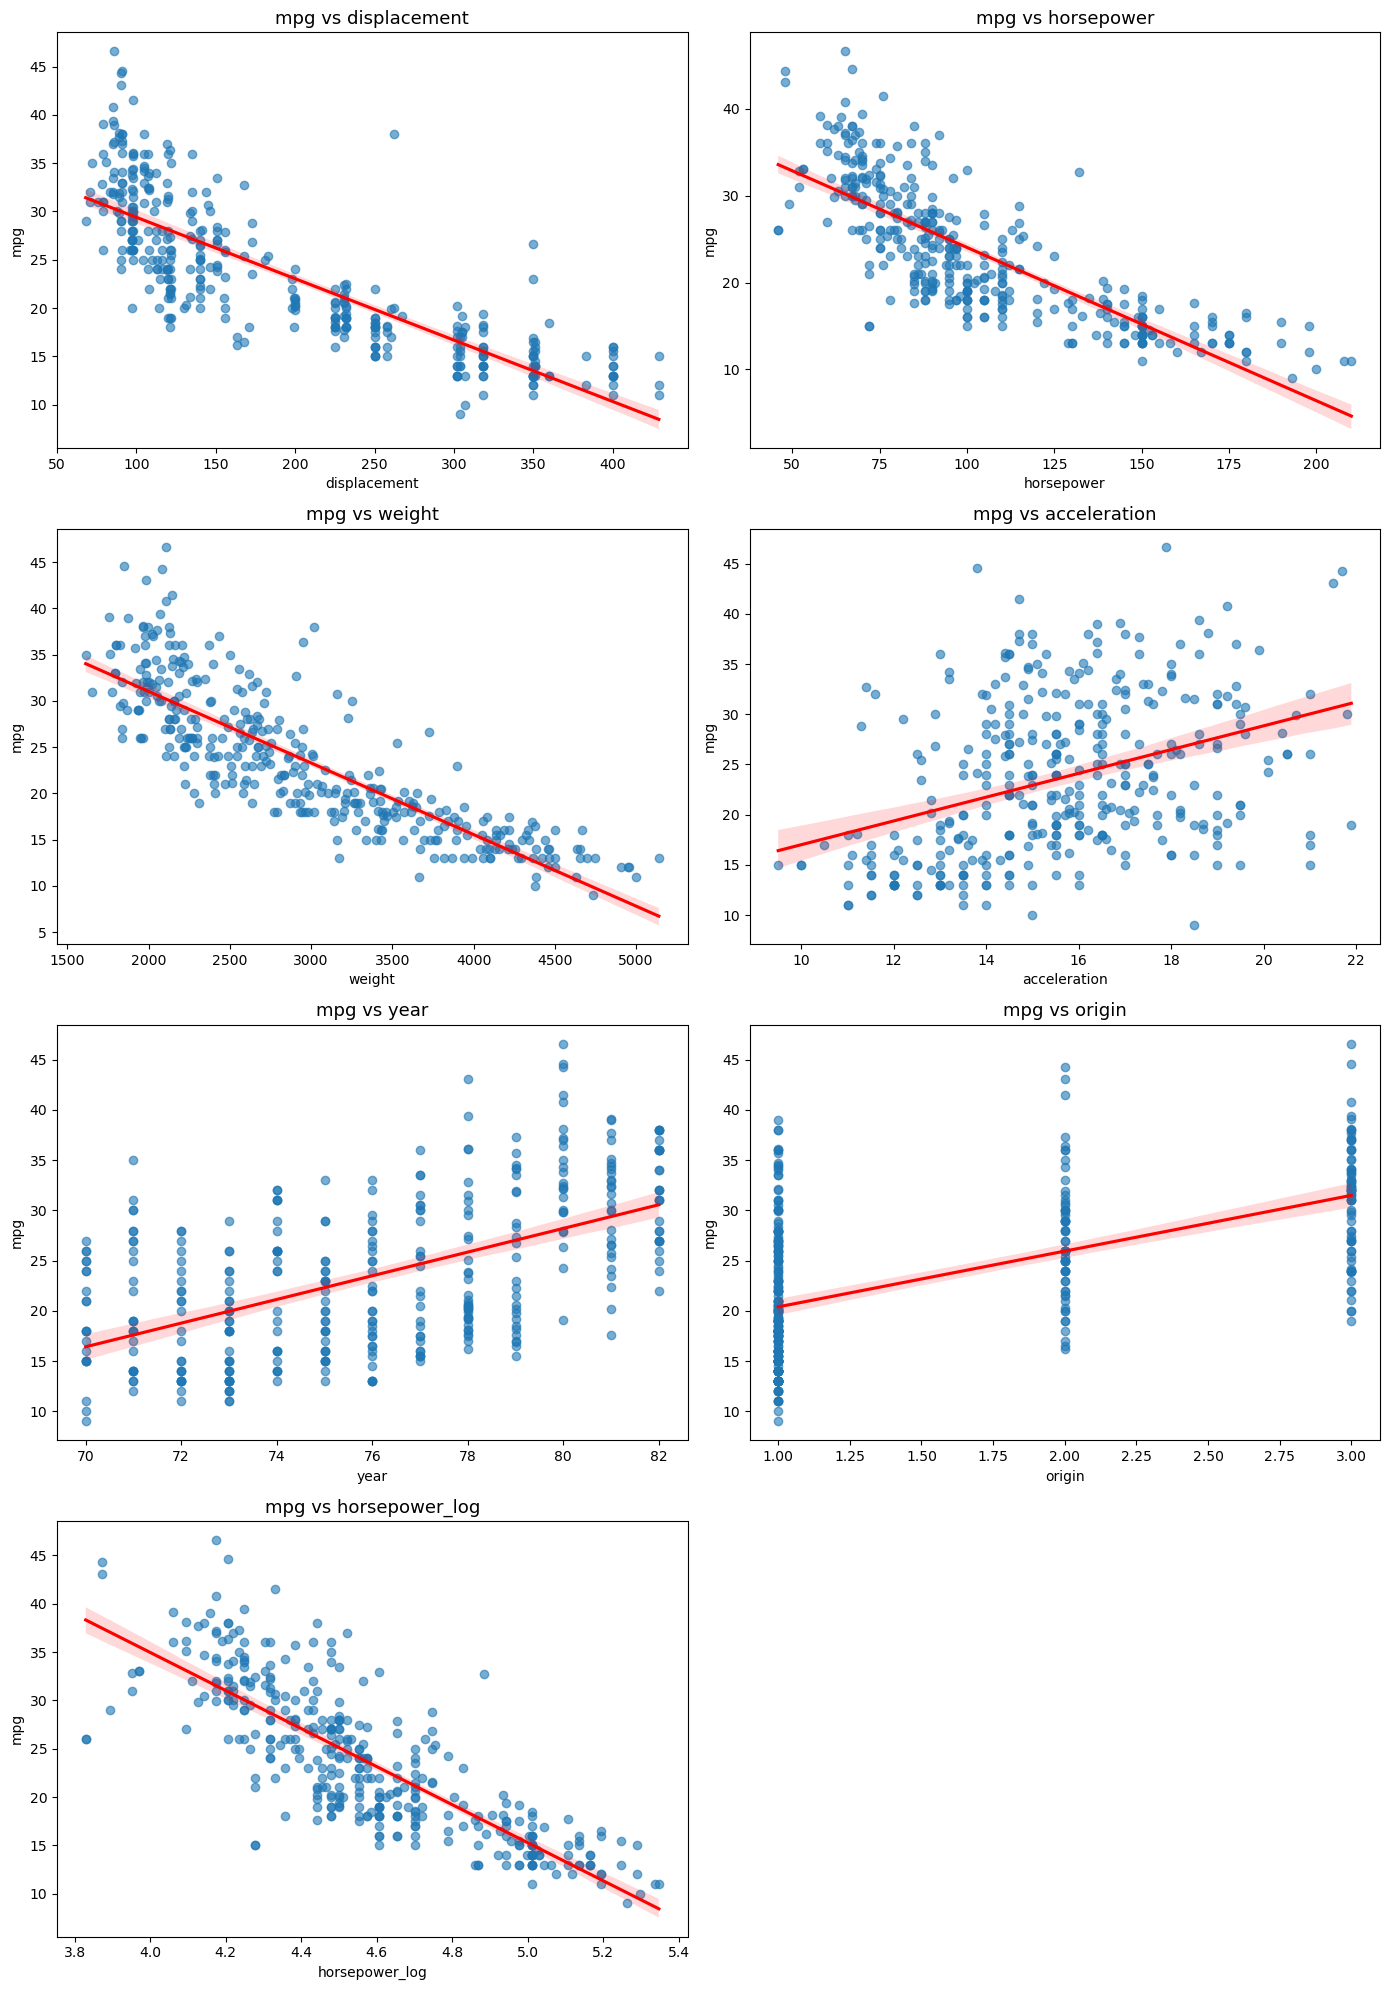

In [394]:
# cars_04_exploratory_data_analysis.py

from src_PJ.cars_04_exploratory_data_analysis import plot_regplots
from src_PJ.config_PJ import INTERIM_DIR

exclude_columns=["name", "cylinders"]
df_final = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv")
plot_regplots(df_final, exclude_columns=exclude_columns)

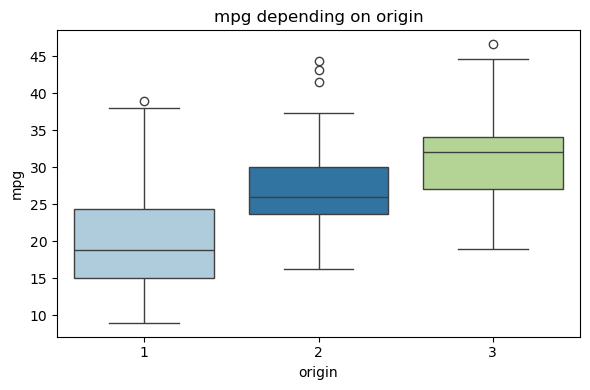

In [395]:
from src_PJ.cars_04_exploratory_data_analysis import categorical_boxplot

df_final = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv")
categorical_boxplot(df_final, 'origin', 'mpg')

USA=1, Europe=2, Japan=3

## **Podsumowanie/Wnioski**

............

# 4. Feature Engineering

## 4.1 Domain knowledge

### Introduction

Feature engineering is the process of creating new, more informative variables from the existing ones to help machine learning models better capture meaningful relationships hidden in the data. In the context of the *cars.csv* dataset, the engineered features introduced here are based on physical and mechanical principles that describe how vehicles behave in real-world conditions.

The goal is to enrich the dataset with domain-driven features that better represent engine efficiency, performance characteristics, and vehicle dynamics. Metrics such as power-to-weight ratio, displacement per cylinder, or acceleration normalized by vehicle weight are commonly used in automotive engineering, because they express fundamental properties of how a car converts energy, accelerates, and consumes fuel.

By adding these engineered features to the dataset, we provide machine learning models with clearer and more structured information. This reduces hidden nonlinearities, improves interpretability, and increases predictive performance, enabling the models to more accurately understand what truly influences fuel efficiency (mpg).




In [396]:
# cars_05_feature_engineering_PJ.py
# power_to_weight, displacement_per_cy, acceleration_per_weight

import src_PJ.cars_05_feature_engineering_PJ as fe
from src_PJ.config_PJ import INTERIM_DIR

# load dataset with horsepower_log
df = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean.csv")
df_fe = df.copy()
print("Shape before FE:", df.shape)

# nwe_features
df_fe = fe.add_power_to_weight(df_fe)
df_fe = fe.add_displacement_per_cylinder(df_fe)
df_fe = fe.add_acceleration_per_weight(df_fe)
print("Shape after FE:", df_fe.shape)

# save
save_path = INTERIM_DIR / "cars_no_cyl_out_log_clean_fe.csv"
df_fe.to_csv(save_path, index=False)

print(f"Feature-engineered dataset saved to:\n{save_path}")

Shape before FE: (371, 10)
Shape after FE: (371, 13)
Feature-engineered dataset saved to:
/Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/interim/cars_no_cyl_out_log_clean_fe.csv


**Description**

As part of the feature engineering process, three new domain-driven variables were created to better capture the physical and mechanical relationships present in the dataset. These engineered features reflect standard metrics used in automotive performance analysis:

- **power_to_weight**
  Defined as `horsepower / weight`, this feature describes how much engine power is available per unit of vehicle mass. Cars with higher power-to-weight ratios typically accelerate faster and demonstrate better overall performance.

- **displacement_per_cyl**
  Calculated as `displacement / cylinders`, this variable expresses the engine displacement allocated to each cylinder. It reflects engine design characteristics and helps differentiate between small, high-efficiency engines and large, low-efficiency ones.

- **acceleration_per_weight**
  Defined as `acceleration / weight`, this feature normalizes the acceleration of a vehicle by its mass. It provides a scale-independent measure of how efficiently the vehicle can gain speed relative to its weight.

These new features enrich the dataset by introducing physically meaningful ratios that reduce nonlinearities and allow machine learning models to understand vehicle dynamics, performance, and fuel efficiency more effectively.


## 4.2 One-Hot_Encoding ('origin')

categorical features
- origin: USA=1, Europe=2, Japan=3

In [397]:
import src_PJ.cars_05_feature_engineering_PJ as fe
from src_PJ.config_PJ import INTERIM_DIR

# Load dataset
df = pd.read_csv(INTERIM_DIR / "cars_no_cyl_out_log_clean_fe.csv")
df_fe = df.copy()
print("Shape before OHE:", df_fe.shape)

# Apply OHE
df_fe = fe.encode_origin(df_fe)

print("Shape after OHE:", df_fe.shape)

# SAVE
save_path = INTERIM_DIR / "cars_feature_engineered_ohe.csv"
df_fe.to_csv(save_path, index=False)

print(f"Saved file to:\n{save_path}")



Shape before OHE: (371, 13)
Shape after OHE: (371, 15)
Saved file to:
/Users/pawel/PycharmProjects/GitHub/Projekt_MLP/data_PJ/interim/cars_feature_engineered_ohe.csv


# 5. Preprocessing

In [401]:
from src_PJ.config_PJ import INTERIM_DIR
import src_PJ.cars_06_preprocessing_PJ as prep

df = pd.read_csv(INTERIM_DIR / "cars_feature_engineered_ohe.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,horsepower_log,power_to_weight,displacement_per_cyl,acceleration_per_weight,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,4.867534,0.037100,38.375,0.003425,False,False,True
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,5.105945,0.044679,43.750,0.003114,False,False,True
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,5.010635,0.043655,39.750,0.003201,False,False,True
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,5.010635,0.043694,38.000,0.003495,False,False,True
4,17.0,8,302.0,140,3449,10.5,70,ford torino,4.941642,0.040591,37.750,0.003044,False,False,True


In [ ]:
X, y, preprocessor, feature_info = prep.prepare_data_for_ml(df)